Notebook to experiment with scaling the number of spatial nodes.

Motivation: EigenMarkov diffusion worked with 10 nodes, but there was a mismatch upon scaling to 100 spatial locations.

### INIT

In [11]:
import sys

sys.path.append("../src/")

# Models
from utils.param_utils import get_ca_init_idx
import models.FiniteDiffRxnDiffusion as fdrd
import models.SpectralRxnDiffusion as srd
import utils.RunMultiruns as rm
import utils.PlotMultiruns as pm

In [12]:
# PLOTTING
binomial_sampling = False  # use binomial sampling for eme markov simulation
print_eigenvalues_and_vectors = False
print_eigenmode_init_conditions = False
print_eigenmode_transition_probability = False
print_eigenmodes_to_spatial_nodes = False
plot_eigenmodes = False
plot_eigenvectors = False
plot_eigenmode_init_conditions = False
plot_eigenmode_markov_simulation = False

### Parameters

In [8]:
# PARAMETERS
n_particles = 50  # number of molecules
n_space_pts = 101  # number of grid points along 1D line
n_time_pts = 100  # number of time points
ca_init_idx = get_ca_init_idx(n_space_pts)  # impulse site
n_eigenmodes = 101  # used in SpectralRxnDiffusion
n_runs = 10  # number of runs for multirun simulations (stochastic)

### FINITE DIFFERENCE

Stability condition satisfied: 1 <= 3.6363636363636362
Initializing solution array...
Beginning simulation...
Time step:  0
Time step:  10
Time step:  20
Time step:  30
Time step:  40
Time step:  50
Time step:  60
Time step:  70
Time step:  80
Time step:  90
Simulation complete!
Plotting...


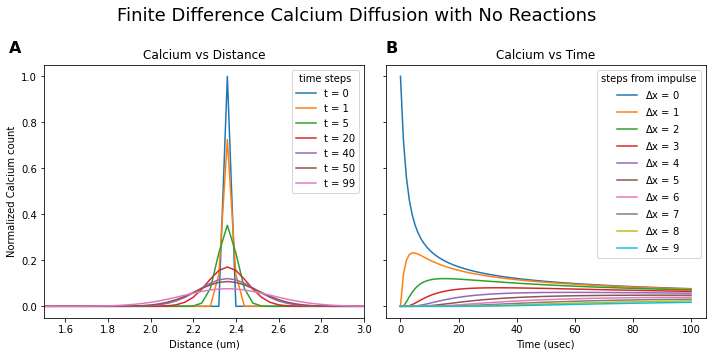

In [9]:
# FINITE DIFFERENCE
# DETERMINISTIC AND NODAL
# NOTE: FD has internal number of particles == 5275
fd = fdrd.FiniteDiffRxnDiffusion(
    n_spatial_locs=n_space_pts, n_time_pts=n_time_pts, impulse_idx=ca_init_idx
)

fd.simulate_diffusion()
fd.plot_diffusion([0, 1, 5, 20, 40, 50, 99])

### SPECTRAL

Initializing solution array...
Beginning simulation...
Time step:  0
Time step:  10
Time step:  20
Time step:  30
Time step:  40
Time step:  50
Time step:  60
Time step:  70
Time step:  80
Time step:  90
Simulation complete!
Plotting...


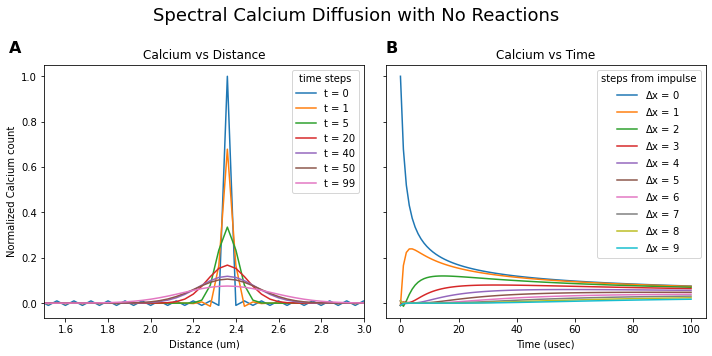

In [5]:
# SPECTRAL
# DETERMINISTIC AND MODAL
# NOTE: SRD has internal number of particles == 5275

sd = srd.SpectralRxnDiffusion(
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    impulse_idx=ca_init_idx,
    n_eigenmodes=n_eigenmodes,
)

sd.simulate_diffusion()
sd.plot_diffusion([0, 1, 5, 20, 40, 50, 99])

### RANDOM WALK

In [ ]:
# RANDOM WALK
# STOCHASTIC AND NODAL
multi_rw = rm.RunMultiruns(
    n_runs=n_runs,
    n_particles=n_particles,
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    particle_start_loc=ca_init_idx,
    scaling_factor=1.0,
)

multi_rw.run_multi_rw(data_dir="../data")

[[0.09019608 0.74509804 0.81176471 1.        ]
 [0.7372549  0.74117647 0.13333333 1.        ]
 [0.49803922 0.49803922 0.49803922 1.        ]
 [0.89019608 0.46666667 0.76078431 1.        ]
 [0.54901961 0.3372549  0.29411765 1.        ]
 [0.58039216 0.40392157 0.74117647 1.        ]
 [0.83921569 0.15294118 0.15686275 1.        ]
 [0.17254902 0.62745098 0.17254902 1.        ]
 [1.         0.49803922 0.05490196 1.        ]
 [0.12156863 0.46666667 0.70588235 1.        ]]
Preparing to plot random walk data...
/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240213_111437/rw-run-000.csv
/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240213_111437/rw-run-001.csv
/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240213_111437/rw-run-002.csv
/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240213_111437/rw-run-003.csv
/Users/margotwagner/projects/diffusion-model/data/eme-valid

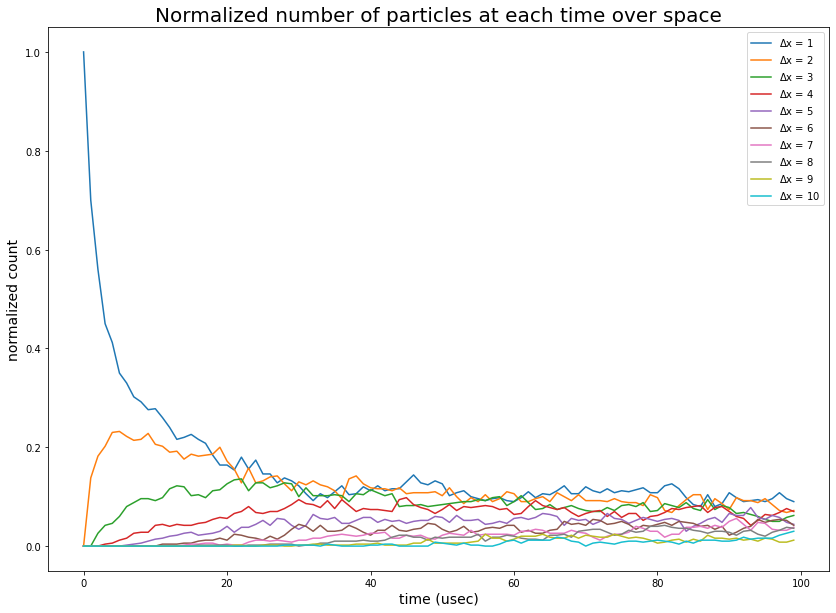

In [10]:
plotter = pm.PlotMultiRuns(
    rw_dir="/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240213_111437/",
    plot_rw=True,
)

plotter.plot_multiruns_space()

Preparing to plot random walk data...
/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240213_111437/rw-run-000.csv
/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240213_111437/rw-run-001.csv
/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240213_111437/rw-run-002.csv
/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240213_111437/rw-run-003.csv
/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240213_111437/rw-run-004.csv
/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240213_111437/rw-run-005.csv
/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240213_111437/rw-run-006.csv
/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240213_111437/rw-run-007.csv
/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240213_111437/rw-ru

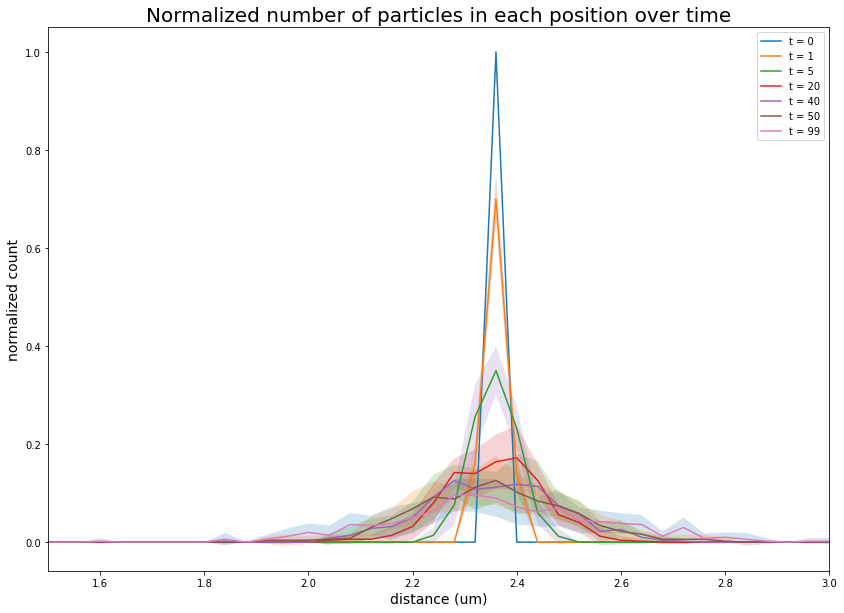

In [5]:
plotter.plot_multiruns_time([0, 1, 5, 20, 40, 50, 99])

### EIGENMARKOV

In [7]:
# EIGENMARKOV
# STOCHASTIC AND MODAL
eigenmarkov = emd.EigenmarkovDiffusion(
    n_particles=n_particles,
    n_spatial_locs=n_spatial_locs,
    n_time_pts=n_time_pts,
    particle_start_loc=particle_start_loc,
    scaling_factor=2,
)

# run eigenmarkov simulation and plot output
n_per_eigenmode_state = eigenmarkov.run_simulation(
    binomial_sampling=binomial_sampling,  # use binomial sampling eme markov simulation
    print_eigenvalues_and_vectors=print_eigenvalues_and_vectors,
    print_init_conditions=print_eigenmode_init_conditions,
    print_transition_probability=print_eigenmode_transition_probability,
    plot_eigenvectors=plot_eigenvectors,
    plot_eigenmodes=plot_eigenmodes,
    plot_init_conditions=plot_eigenmode_init_conditions,
    plot_simulation=plot_eigenmode_markov_simulation,
)
node_vals_from_modes = eigenmarkov.convert_to_spatial_nodes(
    n_per_eigenmode_state, print_output=print_eigenmodes_to_spatial_nodes
)

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'